IMPORTING REQUIRED PACKAGES

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

LOADING DATA

In [2]:
data = pd.read_csv('accident data.csv')

In [3]:
data.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

DATA CLEANING AND TRANSFORMATION

Renaming column names to remove spaces and joining using underscore

In [4]:
data.drop(columns=['Index'], inplace=True)
data.columns = ['_'.join(i.split(' ')) for i in data.columns]

In [5]:
data.columns

Index(['Accident_Severity', 'Accident_Date', 'Latitude', 'Light_Conditions',
       'District_Area', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

Changing Columns to appropriate types for better analysis

In [6]:
data['Accident_Date'] = pd.to_datetime(data['Accident_Date'], format='%d-%m-%Y')
data['District_Area'] = pd.Categorical(data['District_Area'])

Adding year column to the dataframe to make more analysis

In [7]:
data['year'] = data['Accident_Date'].dt.year

In [8]:
data.dtypes

Accident_Severity                  object
Accident_Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District_Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
year                                int32
dtype: object

Looking for Null values in the data and overall datasize

In [9]:
print("Data has",data.shape[0],'observations and',data.shape[1],'fields.')
print('Number of null values are given as:\n',data.isnull().sum())

Data has 660679 observations and 14 fields.
Number of null values are given as:
 Accident_Severity              0
Accident_Date                  0
Latitude                      25
Light_Conditions               0
District_Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
year                           0
dtype: int64


As we have about 660k observations, and the overall missing/NULL values contribute only 2% of the overall observations, we can proceed to drop the Null values, as this will not have much effect on the analysis and its results.

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.dropna(inplace=True)

In [12]:
data = data[~(data['Vehicle_Type']=='Data missing or out of range')]

In [13]:
data.shape

(642740, 14)

Let's go through the summary of the data to get an idea of the overall data

In [14]:
data.describe()

,Accident_Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,year
count,642740,642740.000000,642740.000000,642740.000000,642740.000000,642740.000000
mean,2020-12-01 11:38:08.285776896,52.554432,-1.425318,1.360373,1.832909,2020.412246
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000,2019.000000
25%,2019-11-28 00:00:00,51.490413,-2.320792,1.000000,1.000000,2019.000000
50%,2020-11-14 00:00:00,52.304656,-1.405560,1.000000,2.000000,2020.000000
75%,2021-11-18 00:00:00,53.455546,-0.229388,1.000000,2.000000,2021.000000
max,2022-12-31 00:00:00,60.757544,1.762010,68.000000,32.000000,2022.000000
std,NaN,1.410256,1.381897,0.828142,0.716981,1.109741


The below are the analysis details obtained from the summary:

1. In the number of casualities field, as indicated by the 75% stats value, in most cases, there is only 1 person, either dead or injured in an accident and in rare cases involves more than 1 person.

2. Similarly on average about 2 vehicles are involved in an accident, and only about 25% of the cases, there is only one vehicle involved, while there is a case of 32 vehicles that are involved, which needs to be looked at, as it might be an outlier.

3. As per the latitude's and longitude's details, we can see that the most regions are near Northern ones and are closer to Greenwich, indicating that the data is limited to regions of United Kingdom.

4. The Accident date seems to be distributed normally.

EXPLORATORY DATA ANALYSIS

/var/folders/hc/bnq7ydmn3n11mhn6v2pzy64r0000gn/T/ipykernel_9382/3756025580.py:2: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Number_of_Vehicles',y='Number_of_Casualties',hue='Vehicle_Type',data=data,palette=sns.color_palette())


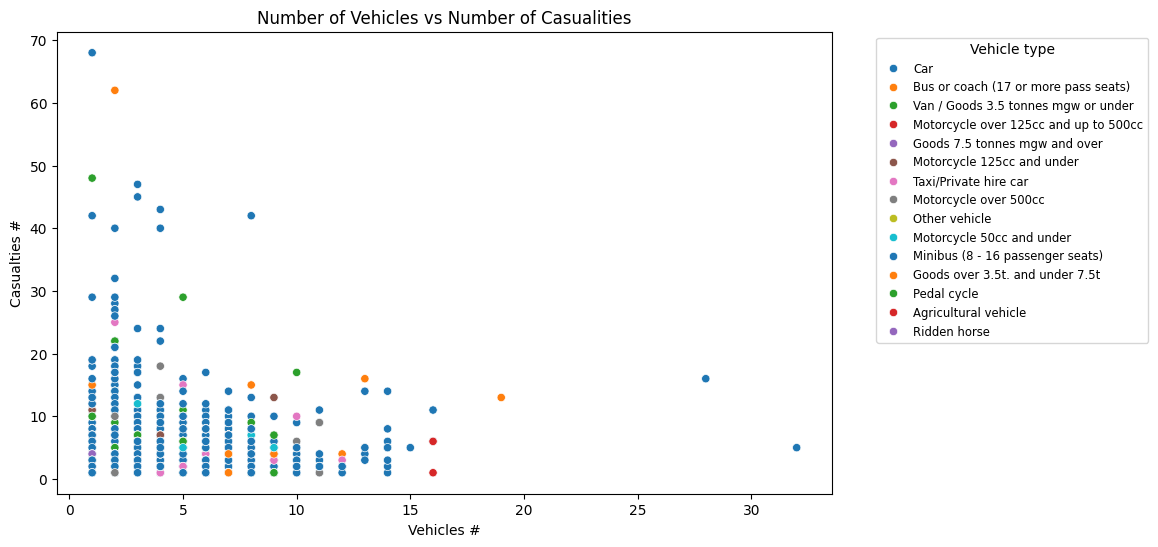

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Number_of_Vehicles',y='Number_of_Casualties',hue='Vehicle_Type',data=data,palette=sns.color_palette())
plt.title('Number of Vehicles vs Number of Casualities')
plt.xlabel('Vehicles #')
plt.ylabel('Casualties #')
plt.legend(title='Vehicle type', bbox_to_anchor = (1.05,1), loc='upper left', fontsize='small')
plt.show()

Cars vehicles type has most acccidents when compared to others.

In [16]:
vehicle_group = data.groupby('Vehicle_Type').agg({'Number_of_Casualties':'sum','Number_of_Vehicles':'sum'}).reset_index()
vehicle_group

,Vehicle_Type,Number_of_Casualties,Number_of_Vehicles
0,Agricultural vehicle,2548,3417
1,Bus or coach (17 or more pass seats),34008,46094
2,Car,659931,888289
3,Goods 7.5 tonnes mgw and over,22841,30904
4,Goods over 3.5t. and under 7.5t,8083,10894
5,Minibus (8 - 16 passenger seats),2599,3487
6,Motorcycle 125cc and under,19824,26985
7,Motorcycle 50cc and under,9956,13678
8,Motorcycle over 125cc and up to 500cc,10051,13639
9,Motorcycle over 500cc,34043,45881


Text(0, 0.5, 'Vehicle Type')

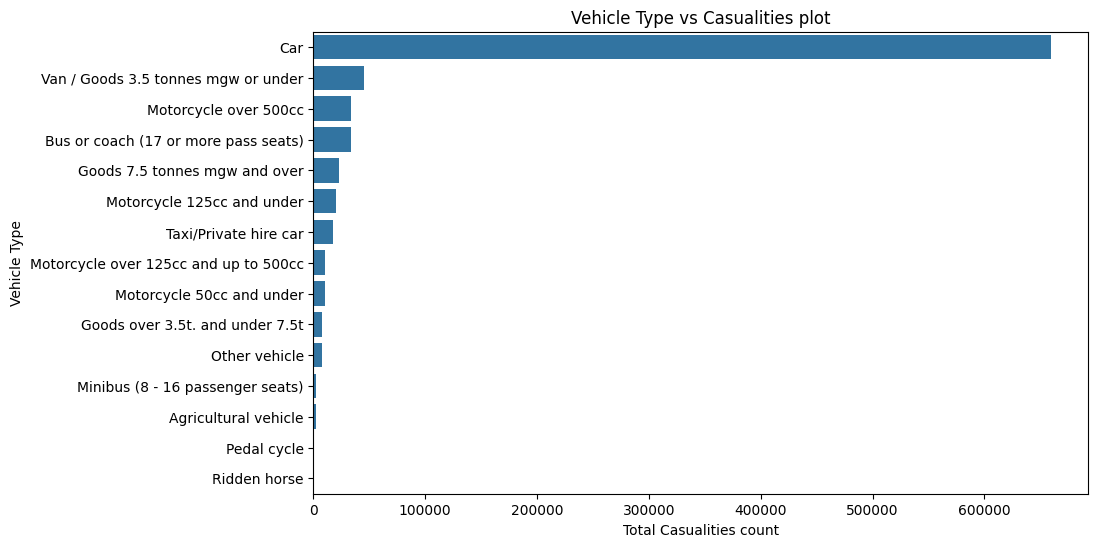

In [17]:
plt.figure(figsize=(10,6))
fig = sns.barplot(vehicle_group.sort_values(by='Number_of_Casualties',ascending=False), x='Number_of_Casualties', y = 'Vehicle_Type',)
plt.title('Vehicle Type vs Casualities plot')
plt.xlabel('Total Casualities count')
plt.ylabel('Vehicle Type')

1. From above it is clear that the Cars have the highest casualities due to road accidents, which is more than even the sum of all the other types, indicating that Vehicle type Car has huge effect on the number of casualities.

2. In case of motorcycles, we can see that the power of the motorcycle, here 500cc, 125cc and 50cc, have a pattern. The greater the power, the more chance of an accident. However, there is one exception with Motorcycles over 125cc and upto 500cc which have less casualities, than the motorcycles with power 125cc and under. This might be due to, the number of such vehicles rode by people.

In [18]:
year_data = data.groupby(by='year').agg({'Number_of_Casualties':['sum','mean','count'],'Number_of_Vehicles':['sum','mean','count']}).reset_index()
year_data.head()

year Number_of_Casualties                   Number_of_Vehicles            \
                         sum      mean   count                sum      mean   
0  2019               241163  1.364700  176715             325324  1.840953   
1  2020               224697  1.357399  165535             302703  1.828634   
2  2021               216833  1.361178  159298             291144  1.827669   
3  2022               191673  1.357534  141192             258913  1.833765   

           
    count  
0  176715  
1  165535  
2  159298  
3  141192

In [19]:
year_data.columns

MultiIndex([(                'year',      ''),
            ('Number_of_Casualties',   'sum'),
            ('Number_of_Casualties',  'mean'),
            ('Number_of_Casualties', 'count'),
            (  'Number_of_Vehicles',   'sum'),
            (  'Number_of_Vehicles',  'mean'),
            (  'Number_of_Vehicles', 'count')],
           )

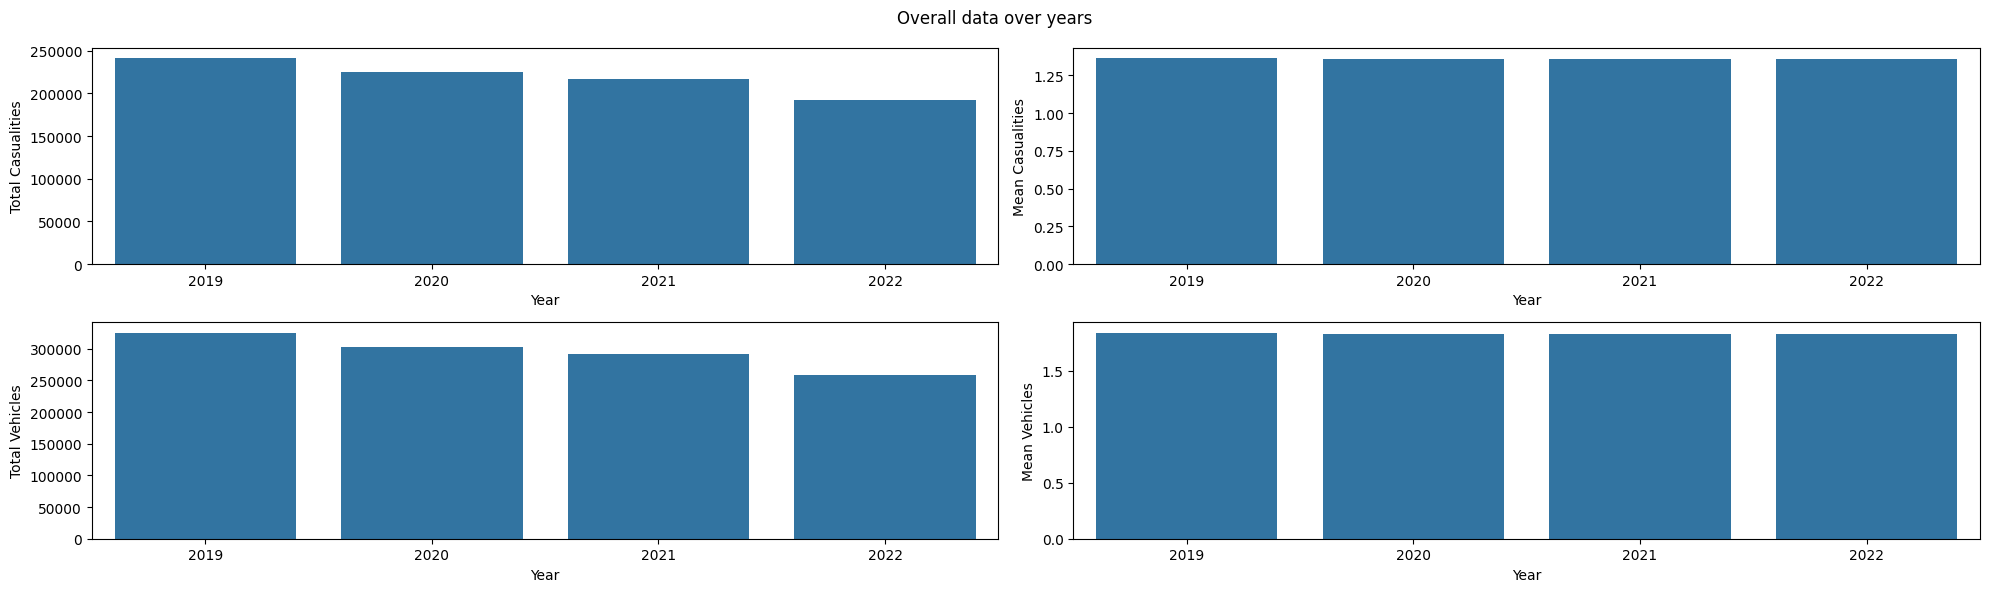

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(20,6))
axs = axs.flatten()

#Plot 1
sns.barplot(year_data, x='year',y=('Number_of_Casualties','sum'), ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total Casualities')

#Plot 2
sns.barplot(year_data, x='year', y=('Number_of_Casualties','mean'), ax=axs[1])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Mean Casualities')

#Plot 3
sns.barplot(year_data, x='year', y=('Number_of_Vehicles','sum'), ax=axs[2])
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Total Vehicles')

#Plot 4
sns.barplot(year_data, x='year', y=('Number_of_Vehicles','mean'), ax=axs[3])
axs[3].set_xlabel('Year')
axs[3].set_ylabel('Mean Vehicles')

plt.suptitle('Overall data over years')
plt.tight_layout()
plt.show()

From above, we can make the below conclusions:

1. Though the overall count in the accidents, ie; Casualities and Vehicles, decreased over years, the mean of these are almost the same, indicating that there is no change in the accident rate over years.

In [21]:
road_surface_data = data.groupby(by='Road_Surface_Conditions').agg({'Number_of_Casualties':['sum','mean','count'],'Number_of_Vehicles':['sum','mean','count'],'Accident_Severity':lambda x: x.value_counts().idxmax()}).reset_index()

In [22]:
road_surface_data

Road_Surface_Conditions Number_of_Casualties                    \
                                           sum      mean   count   
0                     Dry               580694  1.338187  433941   
1    Flood over 3cm. deep                 1487  1.495976     994   
2            Frost or ice                24566  1.349484   18204   
3                    Snow                 7888  1.359766    5801   
4             Wet or damp               259731  1.413118  183800   

  Number_of_Vehicles                   Accident_Severity  
                 sum      mean   count          <lambda>  
0             800054  1.843693  433941            Slight  
1               1599  1.608652     994            Slight  
2              29868  1.640738   18204            Slight  
3              10129  1.746078    5801            Slight  
4             336434  1.830435  183800            Slight

In [23]:
road_surface_data.columns = [('Road_Surface_Condition'),('Overall_Casualties'),
            ('Avg_Casualties'),
            ('Casualties_Count'),
            ('Total_Vehicles'),
            ('Avg_Vehicles'),
            ('Total_Vehicles_count'),
            ('Highest_occurring_severity')]
road_surface_data

,Road_Surface_Condition,Overall_Casualties,Avg_Casualties,Casualties_Count,Total_Vehicles,Avg_Vehicles,Total_Vehicles_count,Highest_occurring_severity
0,Dry,580694,1.338187,433941,800054,1.843693,433941,Slight
1,Flood over 3cm. deep,1487,1.495976,994,1599,1.608652,994,Slight
2,Frost or ice,24566,1.349484,18204,29868,1.640738,18204,Slight
3,Snow,7888,1.359766,5801,10129,1.746078,5801,Slight
4,Wet or damp,259731,1.413118,183800,336434,1.830435,183800,Slight


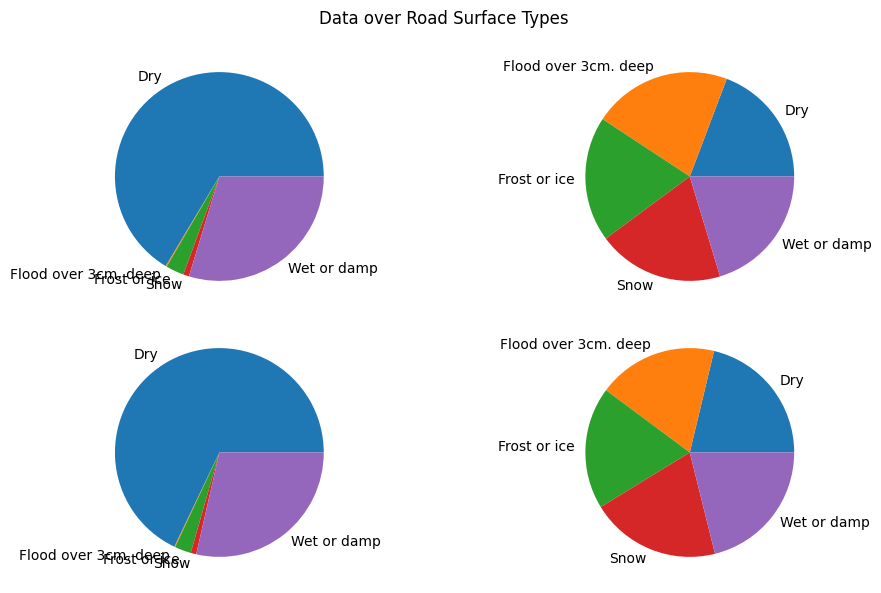

In [24]:
fig, axs = plt.subplots(2,2, figsize = (10,6))
axs = axs.flatten()

#Pie 1
axs[0].pie(road_surface_data['Overall_Casualties'],labels=road_surface_data['Road_Surface_Condition'])

#Pie 2
axs[1].pie(road_surface_data['Avg_Casualties'],labels = road_surface_data['Road_Surface_Condition'])

#Pie 3
axs[2].pie(road_surface_data['Total_Vehicles'], labels = road_surface_data['Road_Surface_Condition'])

#Pie 4
axs[3].pie(road_surface_data['Avg_Vehicles'], labels = road_surface_data['Road_Surface_Condition'])

plt.suptitle('Data over Road Surface Types')
plt.tight_layout()
plt.show()

From above, we can conclude that on average, the number of casualities is highest for 'Flood' road surfaces and lowest for 'dry', however, the total count is highest for 'dry' surfaces and lowest for 'Flood', this is because, the number of observations for dry surfaces is higher than all other surfaces and hence has highest overall count.

<Axes: xlabel='Accident_Severity', ylabel='count'>

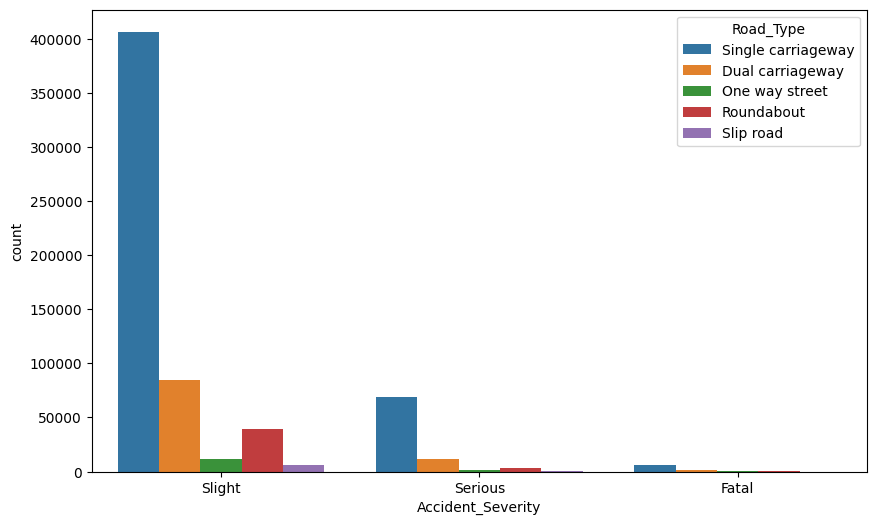

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data, x = 'Accident_Severity', hue='Road_Type', order= data['Accident_Severity'].value_counts(ascending=False).index)

From above we see that Single carriageway road types have most accidents in all severity levels, followed by Dual Carriageway while slip roads have almost the least count in all the levels.

<Axes: xlabel='Light_Conditions', ylabel='count'>

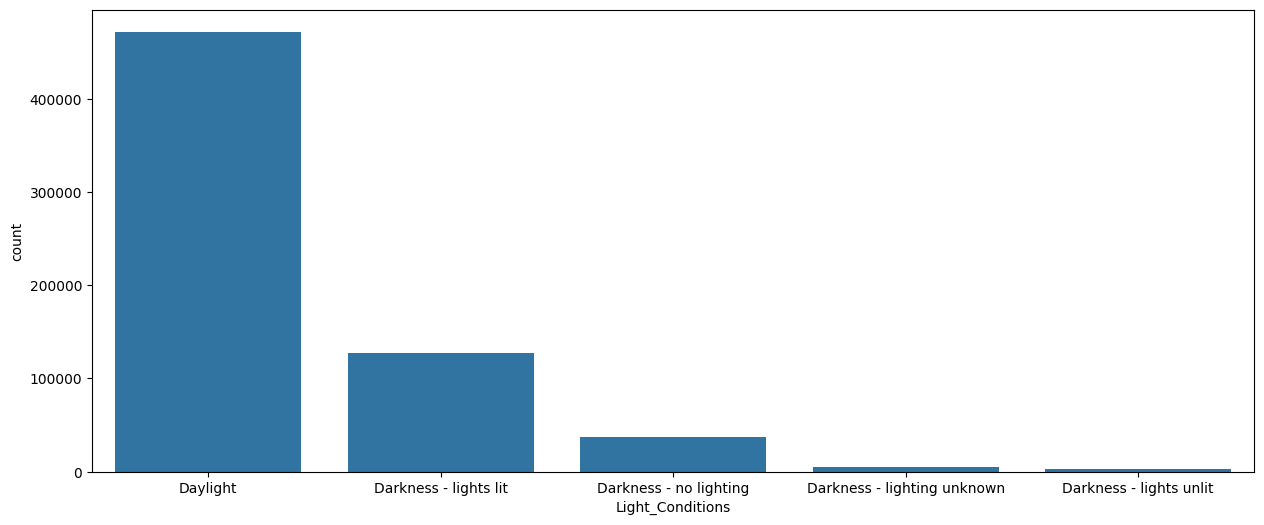

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(data, x = 'Light_Conditions', order=data['Light_Conditions'].value_counts(ascending=False).index)

Text(0.5, 1.0, 'Accident Severity for regions')

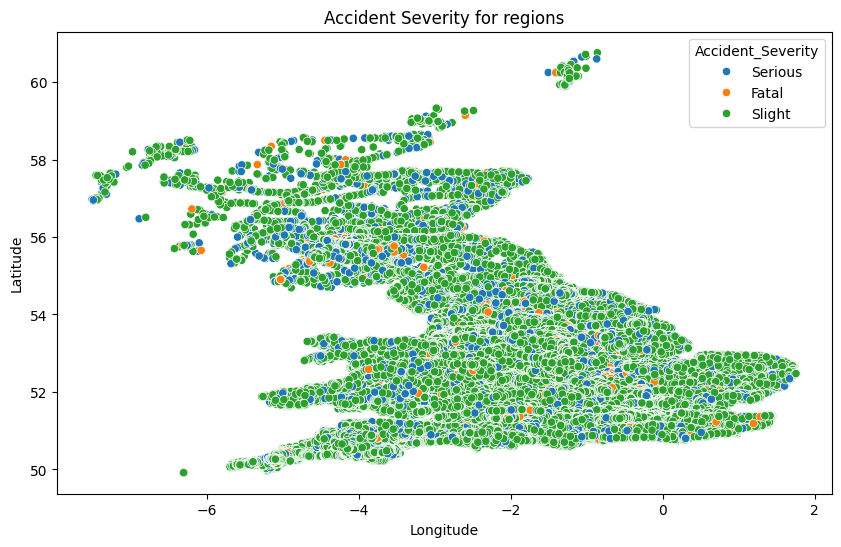

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data, x='Longitude', y= 'Latitude', hue='Accident_Severity')
plt.title('Accident Severity for regions')

<Axes: xlabel='Accident_Severity', ylabel='count'>

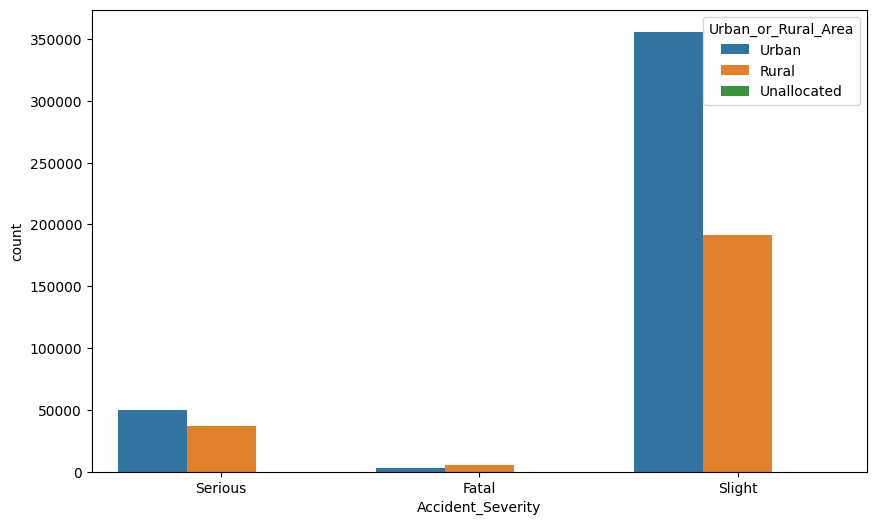

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data, x = 'Accident_Severity', hue='Urban_or_Rural_Area')

From above it is clear that Urban regions have more number of accidents while most of them are slightly severe, while in case of fatal accidents, rural areas seems to have slightly higher count.

Text(0.5, 1.0, 'Bottom 10 District Areas')

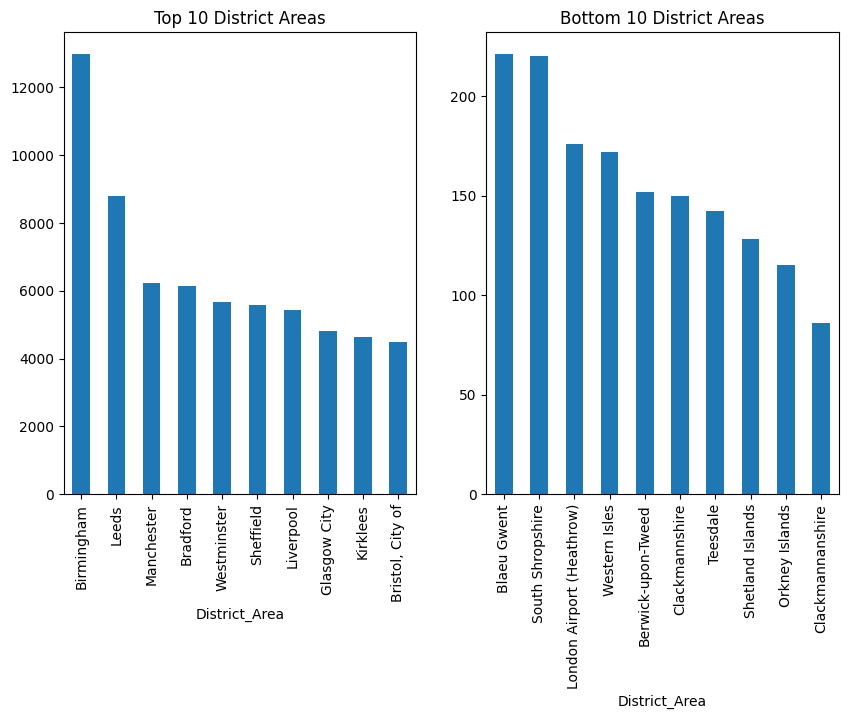

In [29]:
fig, axes = plt.subplots(1,2,figsize=(10,6))
data['District_Area'].value_counts().head(10).plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 10 District Areas')
data['District_Area'].value_counts().tail(10).plot(kind='bar', ax=axes[1])
axes[1].set_title('Bottom 10 District Areas')

Text(0.5, 1.0, 'Correlation Matrix')

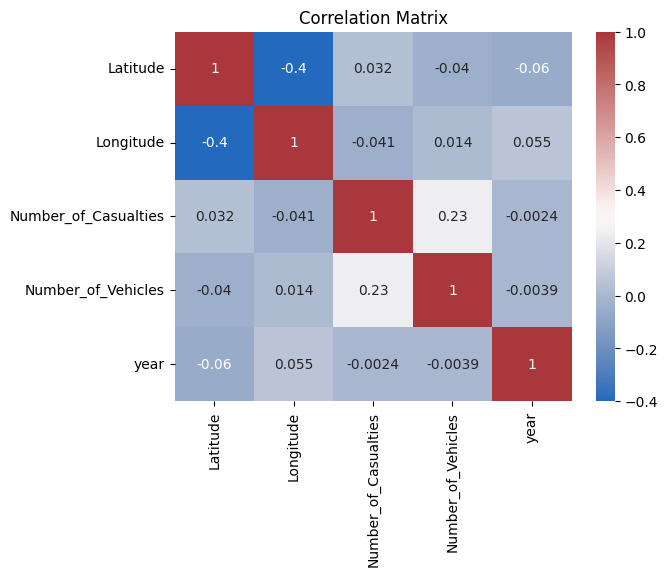

In [30]:
sns.heatmap(data=data.corr(numeric_only=True), cmap='vlag',annot=True)
plt.title('Correlation Matrix')

Time Series Analysis

In [31]:
data['Month'] = data['Accident_Date'].dt.month_name()

In [32]:
data['Quarter'] = data['Accident_Date'].dt.quarter
data['Week_name'] = data['Accident_Date'].dt.day_name()

In [33]:
data['Accident_Severity'] = data['Accident_Severity'].apply(lambda x:0 if x=='Serious' else (1 if x=='Slight' else 2))

In [34]:
data.head()

,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,year,Month,Quarter,Week_name
0,0,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,June,2,Wednesday
1,0,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,July,3,Tuesday
3,0,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,August,3,Friday
5,0,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,September,3,Wednesday
6,0,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,September,3,Thursday


In [35]:
month_group = data.groupby(by=['year','Month']).agg({'Number_of_Casualties':'sum', 'Number_of_Vehicles': 'sum','Accident_Severity':'sum'}).reset_index()

In [36]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_group['Month'] = pd.Categorical(month_group['Month'], categories=month_order, ordered=True)

Text(0.5, 1.0, 'Monthly data of Casualties')

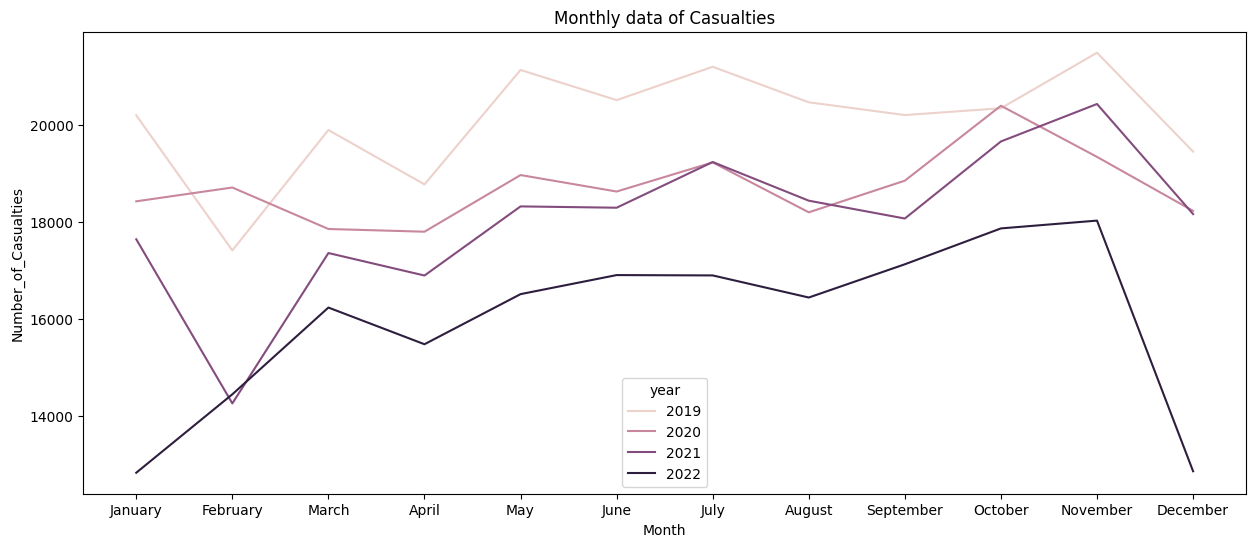

In [37]:
plt.figure(figsize=(15,6))
sns.lineplot(month_group, x='Month', y = 'Number_of_Casualties', hue='year')
plt.title('Monthly data of Casualties')

It is evident that the number of casualties increase at end months of year and decrease in December, this might be due to the reason that December is holiday month and people don't travel much by roads.

<Axes: xlabel='Month', ylabel='Accident_Severity'>

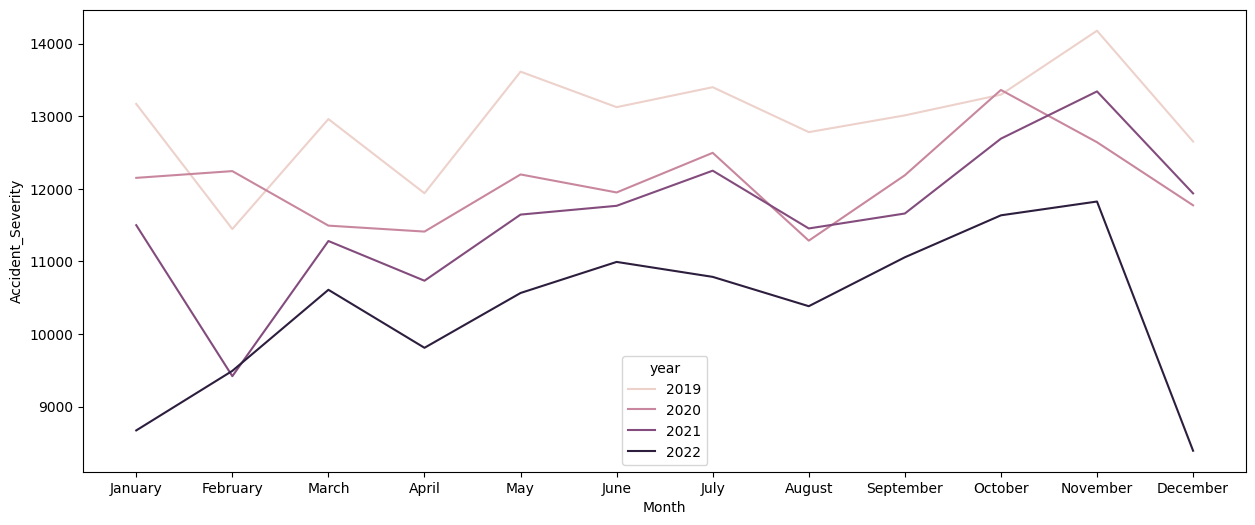

In [38]:
plt.figure(figsize=(15,6))
sns.lineplot(month_group, x='Month', y = 'Accident_Severity', hue='year')